In [1]:
%matplotlib inline

## Exploration

(3956, 5280)


True

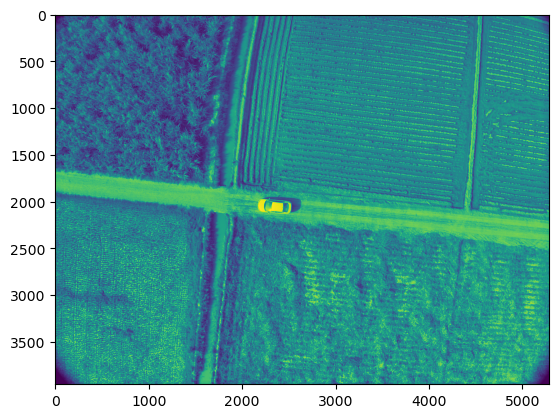

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread(r'images\DJI_20230928151039_0001_D.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
plt.imshow(img)
cv2.imwrite('grey.png', img)

(1944, 2592)
2.0349794238683128 2.037037037037037


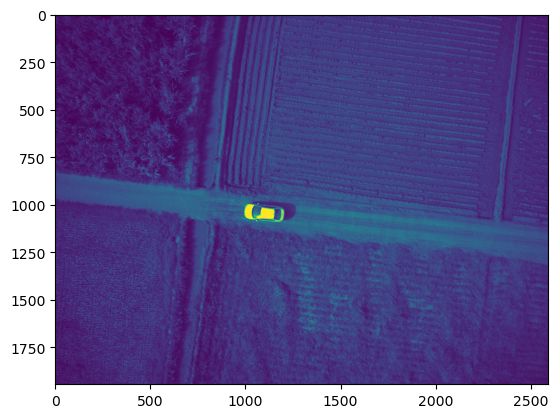

In [13]:
msimg = cv2.imread(r'images\DJI_20230928151039_0001_MS_G.TIF',cv2.IMREAD_UNCHANGED)
print(msimg.shape)
print(img.shape[0]/msimg.shape[0], img.shape[1]/msimg.shape[1])
plt.imshow(msimg)


(1944, 2592)
2.0349794238683128 2.037037037037037


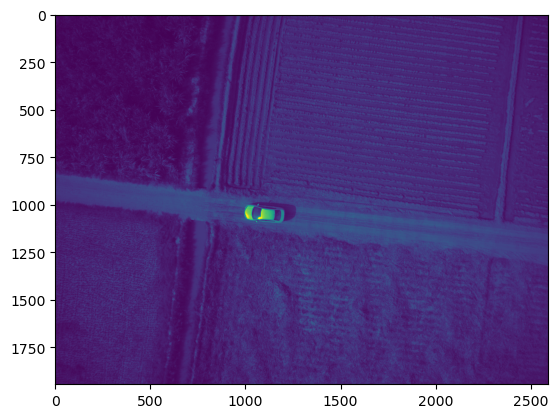

In [14]:
msimg2 = cv2.imread(r'images\DJI_20230928151039_0001_MS_R.TIF',cv2.IMREAD_UNCHANGED)
print(msimg2.shape)
print(img.shape[0]/msimg2.shape[0], img.shape[1]/msimg2.shape[1])
plt.imshow(msimg2)

(1944, 2592)
2.0349794238683128 2.037037037037037


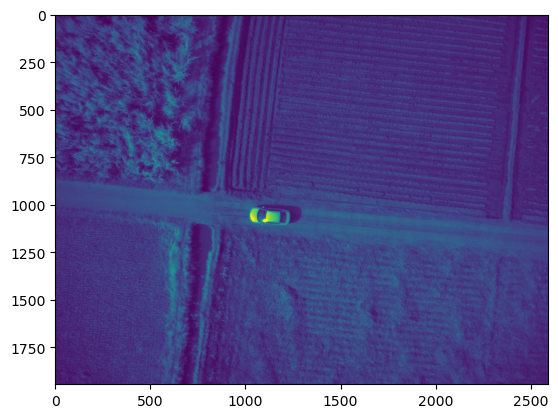

In [15]:
msimg3 = cv2.imread(r'images\DJI_20230928151039_0001_MS_NIR.TIF',cv2.IMREAD_UNCHANGED)
print(msimg3.shape)
print(img.shape[0]/msimg3.shape[0], img.shape[1]/msimg3.shape[1])
plt.imshow(msimg3)

(1944, 2592)
2.0349794238683128 2.037037037037037


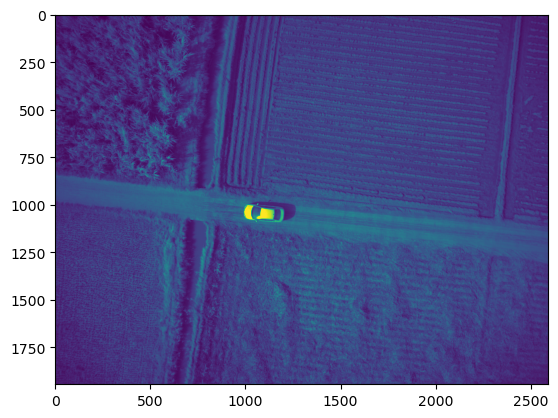

In [16]:
msimg4 = cv2.imread(r'images\DJI_20230928151039_0001_MS_RE.TIF',cv2.IMREAD_UNCHANGED)
print(msimg4.shape)
print(img.shape[0]/msimg4.shape[0], img.shape[1]/msimg4.shape[1])
plt.imshow(msimg4)

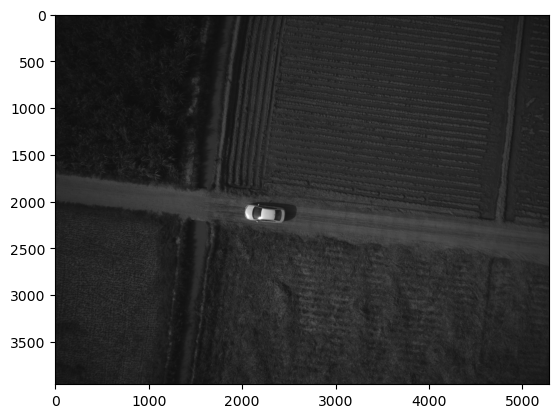

In [7]:
res = cv2.resize(msimg2, dsize=(5280, 3956), interpolation=cv2.INTER_CUBIC)
plt.imshow(res)

In [47]:
plt.imsave('grey.png', img)

In [56]:
# imgr = cv2.imread(r'images\DJI_20230928151039_0001_D.JPG', dtype=cv2.CV_16U)
imgr = img.copy()
imgr = cv2.cvtColor(imgr, cv2.COLOR_GRAY2BGR)
imgr[:, :, 1] = 0  # Set green channel to 0
imgr[:, :, 0] = 0  # Set blue channel to 0
x = cv2.resize(cv2.imread(r'images\DJI_20230928151039_0001_MS_RE.TIF',cv2.IMREAD_UNCHANGED),
                        dsize=img.shape[::-1], interpolation=cv2.INTER_CUBIC)
x = cv2.cvtColor(x, cv2.COLOR_GRAY2BGR)
x[:, :, 0] = 0 
x[:, :, 2] = 0
x = cv2.convertScaleAbs(x, alpha=(255.0/65535.0))
print(imgr.dtype, x.dtype)
out = cv2.addWeighted( imgr, 0.7, x, 0.3, 0, dtype=cv2.CV_8U)
cv2.imwrite("out.png", out)
cv2.imwrite("ms.png", x)
cv2.imwrite("grey.png", imgr)

# plt.imshow(out)
# cv2.imwrite("ms.png", cv2.resize(cv2.imread(r'images\DJI_20230928151039_0001_MS_RE.TIF',cv2.IMREAD_UNCHANGED),
#                         dsize=img.shape[::-1], interpolation=cv2.INTER_CUBIC))


# sensor size, x, y

uint8 uint8


True

## Comparisons

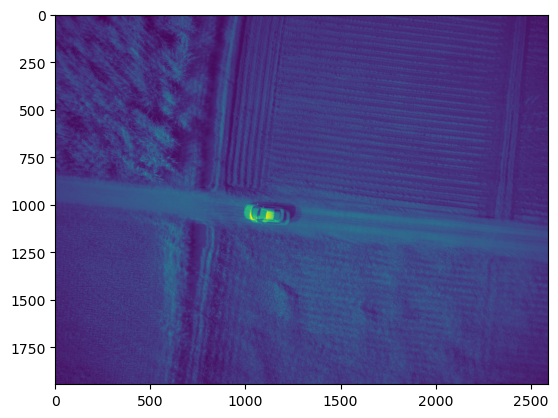

In [22]:
########## oRIGINALS ##############3
plt.imshow(cv2.addWeighted(cv2.imread(r'images\DJI_20230928151039_0001_MS_NIR.TIF',cv2.IMREAD_UNCHANGED), 0.5, 
                           cv2.imread(r'images\DJI_20230928151039_0001_MS_RE.TIF',cv2.IMREAD_UNCHANGED), 0.5, 0))

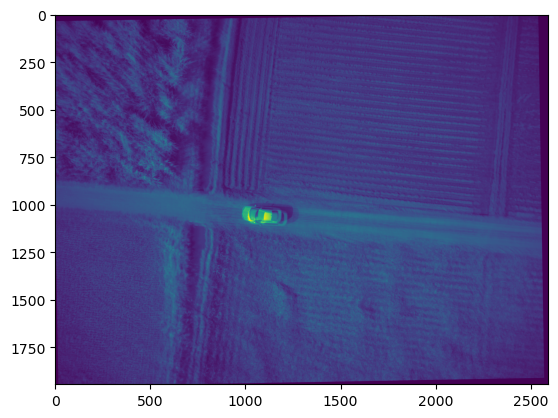

In [21]:
############### Processed ################
plt.imshow(cv2.addWeighted(cv2.imread(r'NIR\phase_undistort_DJI_20230928151039_0001_MS_NIR.TIF',cv2.IMREAD_UNCHANGED), 0.5, 
                           cv2.imread(r'RE\phase_undistort_DJI_20230928151039_0001_MS_RE.TIF',cv2.IMREAD_UNCHANGED), 0.5, 0))

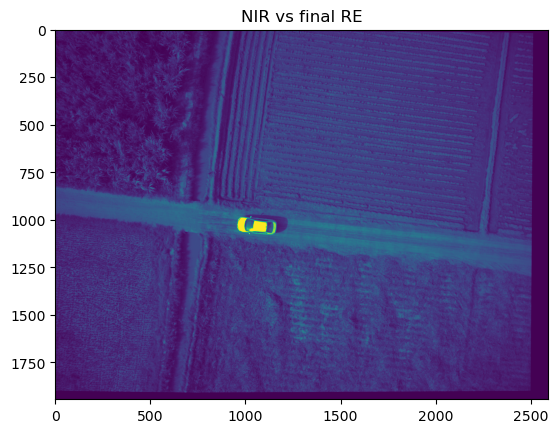

In [58]:
############3 aligned #############
plt.title('NIR vs final RE')
plt.imshow(cv2.addWeighted(cv2.convertScaleAbs(cv2.imread(r'images\DJI_20230928151039_0001_MS_NIR.TIF',cv2.IMREAD_UNCHANGED)), 0.5, 
                           cv2.imread(r'G\phase_undistort_DJI_20230928151039_0001_MS_G_final.TIF',cv2.IMREAD_UNCHANGED), 0.5, 0))

In [60]:
imgr = cv2.imread(r'images\DJI_20230928151039_0001_MS_R.TIF',cv2.IMREAD_UNCHANGED)
imgr = cv2.cvtColor(imgr, cv2.COLOR_GRAY2BGR)
imgr[:, :, 1] = 0  # Set green channel to 0
imgr[:, :, 0] = 0  # Set blue channel to 0
x = cv2.imread(r'images\DJI_20230928151039_0001_MS_RE.TIF',cv2.IMREAD_UNCHANGED)
x = cv2.cvtColor(x, cv2.COLOR_GRAY2BGR)
x[:, :, 0] = 0 
x[:, :, 2] = 0
out = cv2.addWeighted( x, 0.5, imgr, 0.5,0, dtype=cv2.CV_16U)
cv2.imwrite("finalout.png", out)
cv2.imwrite("msre.png", x)
cv2.imwrite("msnir.png", imgr)

# plt.imshow(out)
# cv2.imwrite("ms.png", cv2.resize(cv2.imread(r'images\DJI_20230928151039_0001_MS_RE.TIF',cv2.IMREAD_UNCHANGED),
#                         dsize=img.shape[::-1], interpolation=cv2.INTER_CUBIC))

True

## DGI Information

In [ ]:
# MS
# 1/2.8-inch CMOS, effective pixels: 5 MP
# IMSIZE 1/2.8-inch CMOS, effective pixels: 5 MP
# 5.7mm, 4.3mm
# 2592×1944
# per mm 2592/5.7, 1944/4.3
# 454.74mm, 452.09mm



# MS
# 1/2.8-inch CMOS, effective pixels: 5 MP
# IMSIZE 1/2.8-inch CMOS, effective pixels: 5 MP
# 5.7mm, 4.3mm
# 2592×1944
# per mm 5.7/2592, 4.3/1944
# 0.0021991 mm/pixel, 0.0022119 mm/pixel
# 2.1991m, 2.2119m



# RGB
# 4/3 CMOS, effective pixels: 20 MP
# 17.30mm, 13.00mm
# 5280×3956
# per mm 17.3/5280, 13.0/3956
# 0.0032765 mm/pixel, 0.0032861 mm/pixel
# 3.2765m, 3.2861m

## Overlay in center

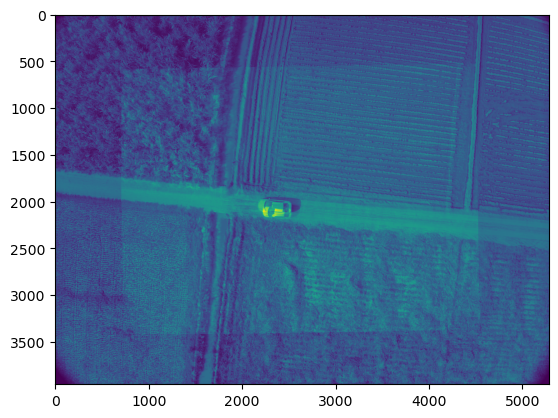

In [56]:
import cv2
import numpy as np

# Load the RGB and multispectral images
rgb_image = cv2.cvtColor(cv2.imread(r'images\DJI_20230928151039_0001_D.JPG'), cv2.COLOR_BGR2GRAY)  # Replace with actual path
ms_image = cv2.imread(r'NIR\phase_undistort_DJI_20230928151039_0001_MS_NIR.TIF', cv2.IMREAD_UNCHANGED)  # Replace with actual path

# Define the pixel sizes in mm/pixel for each image
ms_pixel_size_x = 0.0021991
ms_pixel_size_y = 0.0022119
rgb_pixel_size_x = 0.0032765
rgb_pixel_size_y = 0.0032861

# Resize the multispectral image to match the dimensions of the RGB image
# ms_resized = cv2.resize(ms_image, (rgb_image.shape[1], rgb_image.shape[0]))

# Calculate the scaling factors based on pixel sizes
scale_x = ms_pixel_size_x / rgb_pixel_size_x
scale_y = ms_pixel_size_y / rgb_pixel_size_y

# Resize the multispectral image to align with RGB image
ms_resized = cv2.resize(ms_image, None, fx=1/scale_x, fy=1/scale_y)

# Define the position to anchor the smaller image (e.g., 'center' or 'topleft')
anchor_position = 'center'

# Calculate the offset based on the anchor position
offset_x = (rgb_image.shape[1] - ms_resized.shape[1]) // 2 if anchor_position == 'center' else 0
offset_y = (rgb_image.shape[0] - ms_resized.shape[0]) // 2 if anchor_position == 'center' else 0

# Create a mask for the smaller image
mask = np.zeros_like(rgb_image)
mask[offset_y:offset_y+ms_resized.shape[0], offset_x:offset_x+ms_resized.shape[1]] = ms_resized

# Overlay the images
output_image = cv2.addWeighted(rgb_image, 0.5, mask, 0.5, 0)

# Display the result
cv2.imwrite('Overlay.png', output_image)
plt.imshow(output_image)
